### Mini_proj_basic_DSCR
1. EDA
    1. 범주형 데이터 gender, oral, tartar 를 0과 1로 라벨링
    2. object형 데이터 변환
2. 훈련 
    1. random_state = 42로 설정
    2. 

### EDA

- gender 성별
- age 나이
- height 키
- weight 몸무게
- eyesight(left, right) 왼쪽 시력, 오른쪽 시력
- hearing(left, right) 왼쪽 청력, 오른쪽 청력

- systolic 최고혈압(대동맥 내로 보내지는 심실 수축기의 혈압)
- relaxation 최저혈압
- fasting blood sugar 공복혈당
- Cholesterol 총 콜레스테롤
- triglyceride 중성지방
- HDL 고밀도지단백 (콜레스테롤)
- LDL 저밀도지단백 (콜레스테롤)
- hemoglobin 헤모글로빈 수치
- Urine protein 단백뇨
- serum creatinine 혈액 또는 소변에서 크레아티닌 양 측정 - *신장*관련

- AST 아스파르테이트 아미노 전달효소 *간*
- ALT 알라닌 아미노 전달효소 *간* 
    - AST, ALT의 정상 범위 ~40, 경도 40~ 200, 중등도 200~400, 중증 400~
- Gtp 감마 Gtp간 기능 검사 *알코올 관련*
    - 정상 ~50, 가벼운 증가 51~100, 중간정도의 증가 101~200, 고도의 증가 201~500, 초고도 증가 500~
    - 술 마시지 않는 사람도 높게 나올 수 있다.
    
- oral 구강검사 여부
- dental caries 충치 갯수
- tartar 치석존재여부

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
df = pd.read_csv('C:/ds_work/ML_DATA/smoking.csv')
df.shape  # (55693, 27)

(55692, 27)

In [4]:
df = df.replace({'F':0,'M':1})

from sklearn.preprocessing import LabelEncoder

lbe = LabelEncoder()
lbe.fit_transform(df["oral"])
df["oral"] = lbe.fit_transform(df["oral"])

lbe.fit_transform(df["tartar"])
df["tartar"] = lbe.fit_transform(df["tartar"])

df.info()

df = df.astype(float)

array([0, 0, 0, ..., 0, 0, 0])

array([1, 1, 0, ..., 0, 0, 1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  int64  
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [5]:
#df['tartar'] = df['tartar'].map({'Y': 0, 'N': 1})
#df['oral']=df['oral'].map({'Y':0,'N':1})

In [5]:
target = df.loc[:, 'smoking']
target

0        0.0
1        0.0
2        1.0
3        0.0
4        0.0
        ... 
55687    0.0
55688    0.0
55689    0.0
55690    0.0
55691    1.0
Name: smoking, Length: 55692, dtype: float64

In [6]:
df_or = df.iloc[:, 24:26]
df_or

,dental caries,tartar
0,0.0,1.0
1,0.0,1.0
2,0.0,0.0
3,0.0,1.0
4,0.0,0.0
...,...,...
55687,1.0,1.0
55688,0.0,1.0
55689,0.0,0.0
55690,0.0,0.0


In [7]:
oral = pd.concat([df_or,target], axis=1)
oral

,dental caries,tartar,smoking
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,0.0,0.0,0.0
...,...,...,...
55687,1.0,1.0,0.0
55688,0.0,1.0,0.0
55689,0.0,0.0,0.0
55690,0.0,0.0,0.0


In [9]:
oral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   oral           55692 non-null  float64
 1   dental caries  55692 non-null  float64
 2   tartar         55692 non-null  float64
 3   smoking        55692 non-null  float64
dtypes: float64(4)
memory usage: 1.7 MB


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(oral.iloc[:,:-1],oral.iloc[:,-1], test_size=0.2, random_state=42)

### 3. 훈련01

In [10]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

x_train_std = stdsc.fit_transform(X_train)
x_test_std = stdsc.transform(X_test)

print("x_train_std mean : ",x_train_std.mean())
print("x_train_std std: ",x_train_std.std())

print("x_test_std mean: ",x_test_std.mean())
print("x_test_std std: ",x_test_std.std())

x_train_std mean :  8.13361154664447e-17
x_train_std std:  1.0
x_test_std mean:  0.005160204452225515
x_test_std std:  1.002718440612952


In [13]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

x_train_t = mms.fit_transform(X_train)
x_test_t = mms.transform(X_test)

print("x_train_t max : ",x_train_t.max())
print("x_train_t min: ",x_train_t.min())

print("x_test_t max : ",x_test_t.max())
print("x_test_t min: ",x_test_t.min())

x_train_t max :  1.0
x_train_t min:  0.0
x_test_t max :  1.0
x_test_t min:  0.0


In [15]:
from sklearn.preprocessing import RobustScaler
rbs = RobustScaler()

x_train_r = rbs.fit_transform(X_train)
x_test_r = rbs.transform(X_test)

print("x_train_r mean : ",x_train_r.mean())
print("x_test_r mean : ",x_test_r.mean())

x_train_r mean :  -0.11599667811370727
x_test_r mean :  -0.11378938863452734


#### DecisionTreeClassifier

DecisionTreeClassifier()

0.6308465750965078

confusion_matrix : 
 [[7027    0]
 [4112    0]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

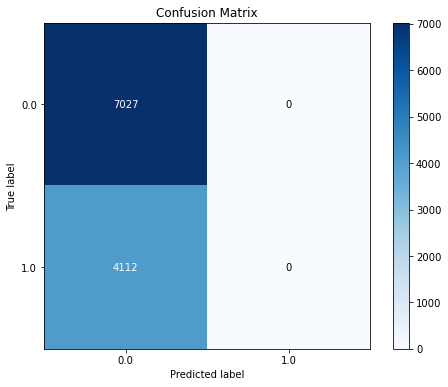

리포트:
               precision    recall  f1-score   support

         0.0       0.63      1.00      0.77      7027
         1.0       0.00      0.00      0.00      4112

    accuracy                           0.63     11139
   macro avg       0.32      0.50      0.39     11139
weighted avg       0.40      0.63      0.49     11139



C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#from sklearn.metrics import precision_score

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

pred = model.predict(X_test)
acc = accuracy_score(y_test,pred)
acc

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(X_test)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

DecisionTreeClassifier()

0.6308465750965078

confusion_matrix : 
 [[7027    0]
 [4112    0]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

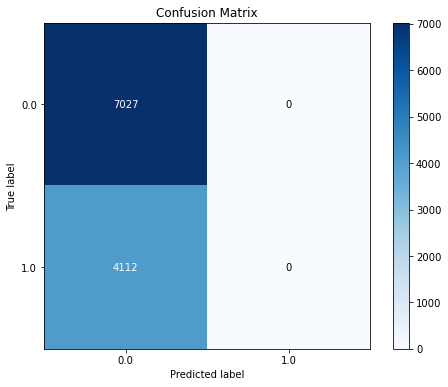

리포트:
               precision    recall  f1-score   support

         0.0       0.63      1.00      0.77      7027
         1.0       0.00      0.00      0.00      4112

    accuracy                           0.63     11139
   macro avg       0.32      0.50      0.39     11139
weighted avg       0.40      0.63      0.49     11139



C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#from sklearn.metrics import precision_score

model = DecisionTreeClassifier()
model.fit(x_train_std,y_train)

pred = model.predict(x_test_std)
acc = accuracy_score(y_test,pred)
acc

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(x_test_std)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

DecisionTreeClassifier()

0.6308465750965078

confusion_matrix : 
 [[7027    0]
 [4112    0]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

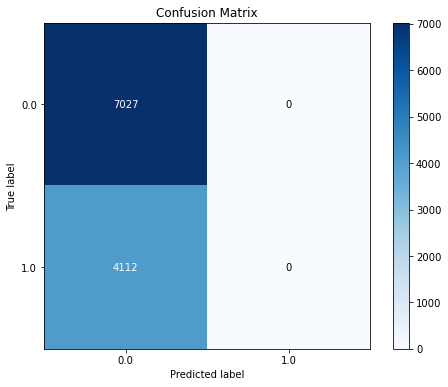

리포트:
               precision    recall  f1-score   support

         0.0       0.63      1.00      0.77      7027
         1.0       0.00      0.00      0.00      4112

    accuracy                           0.63     11139
   macro avg       0.32      0.50      0.39     11139
weighted avg       0.40      0.63      0.49     11139



C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#from sklearn.metrics import precision_score

model = DecisionTreeClassifier()
model.fit(x_train_t,y_train)

pred = model.predict(x_test_t)
acc = accuracy_score(y_test,pred)
acc

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(x_test_t)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

DecisionTreeClassifier()

0.6308465750965078

confusion_matrix : 
 [[7027    0]
 [4112    0]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

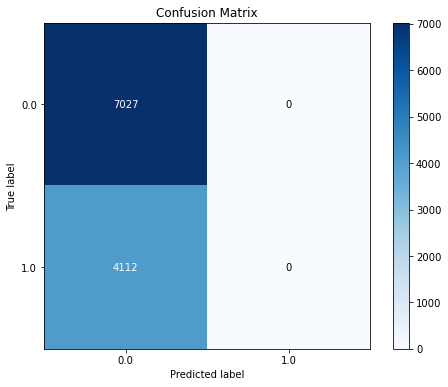

리포트:
               precision    recall  f1-score   support

         0.0       0.63      1.00      0.77      7027
         1.0       0.00      0.00      0.00      4112

    accuracy                           0.63     11139
   macro avg       0.32      0.50      0.39     11139
weighted avg       0.40      0.63      0.49     11139



C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#from sklearn.metrics import precision_score

model = DecisionTreeClassifier()
model.fit(x_train_r,y_train)

pred = model.predict(x_test_r)
acc = accuracy_score(y_test,pred)
acc

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(x_test_r)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

#### RandomForestClassifier

RandomForestClassifier()

0.6308465750965078

confusion_matrix : 
 [[7027    0]
 [4112    0]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

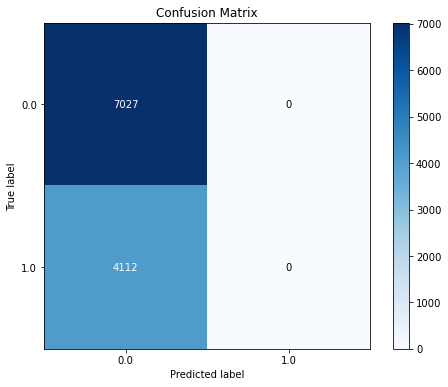

리포트:
               precision    recall  f1-score   support

         0.0       0.63      1.00      0.77      7027
         1.0       0.00      0.00      0.00      4112

    accuracy                           0.63     11139
   macro avg       0.32      0.50      0.39     11139
weighted avg       0.40      0.63      0.49     11139



C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
#import warnings warnings.filterwarnings("ignore")
model = RandomForestClassifier()
model.fit(X_train,y_train)

pred = model.predict(X_test)
acc = accuracy_score(y_test,pred)
acc

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(X_test)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

### XGBoost

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=10, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

0.6308465750965078

confusion_matrix : 
 [[7027    0]
 [4112    0]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

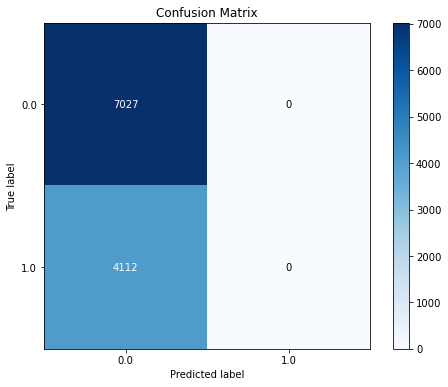

리포트:
               precision    recall  f1-score   support

         0.0       0.63      1.00      0.77      7027
         1.0       0.00      0.00      0.00      4112

    accuracy                           0.63     11139
   macro avg       0.32      0.50      0.39     11139
weighted avg       0.40      0.63      0.49     11139



C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
#XGBoost1
import xgboost as xgb
import pandas as pd
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = xgb.XGBClassifier(early_stopping_rounds=10)
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_set=eval_set, verbose=False)#, verbose=True

pred = model.predict(X_test)
acc = accuracy_score(y_test,pred)
acc

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(X_test)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

14
0.6493960733724695


0.6493960733724695

array([0.        , 0.5476304 , 0.45236957], dtype=float32)

<BarContainer object of 3 artists>

리포트:
               precision    recall  f1-score   support

         0.0       0.63      1.00      0.77      7027
         1.0       0.00      0.00      0.00      4112

    accuracy                           0.63     11139
   macro avg       0.32      0.50      0.39     11139
weighted avg       0.40      0.63      0.49     11139



C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


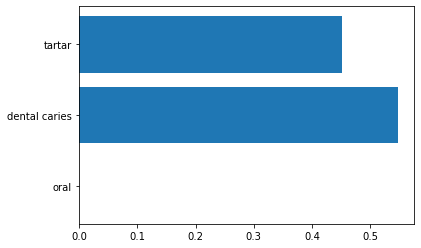

In [16]:
#XGBoost2
# best_iteration
print(model.best_iteration)
print(model.best_score)

from sklearn import metrics
y_pred = model.predict_proba(X_test)
metrics.log_loss(y_test, y_pred)

# feature_importances_
import matplotlib.pyplot as plt 
model.feature_importances_
plt.barh(oral.iloc[:,:-1].columns, model.feature_importances_)

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

### LGBMClassifier

[1]	valid_0's binary_logloss: 0.656812
Training until validation scores don't improve for 10 rounds
[2]	valid_0's binary_logloss: 0.655435
[3]	valid_0's binary_logloss: 0.654318
[4]	valid_0's binary_logloss: 0.653412
[5]	valid_0's binary_logloss: 0.652676
[6]	valid_0's binary_logloss: 0.652077
[7]	valid_0's binary_logloss: 0.65159
[8]	valid_0's binary_logloss: 0.651193
[9]	valid_0's binary_logloss: 0.650869
[10]	valid_0's binary_logloss: 0.650605
[11]	valid_0's binary_logloss: 0.650445
[12]	valid_0's binary_logloss: 0.650347
[13]	valid_0's binary_logloss: 0.650174
[14]	valid_0's binary_logloss: 0.65001
[15]	valid_0's binary_logloss: 0.649907
[16]	valid_0's binary_logloss: 0.649832
[17]	valid_0's binary_logloss: 0.649814
[18]	valid_0's binary_logloss: 0.649783
[19]	valid_0's binary_logloss: 0.649714
[20]	valid_0's binary_logloss: 0.649638
[21]	valid_0's binary_logloss: 0.649613
[22]	valid_0's binary_logloss: 0.649615
[23]	valid_0's binary_logloss: 0.649586
[24]	valid_0's binary_logloss:

LGBMClassifier(boosting_type='goss', max_depth=5, random_state=0)

0.6308465750965078

confusion_matrix : 
 [[7027    0]
 [4112    0]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

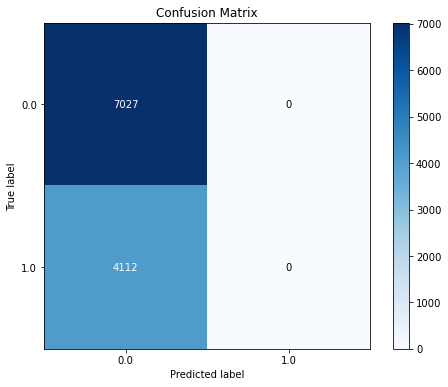

리포트:
               precision    recall  f1-score   support

         0.0       0.63      1.00      0.77      7027
         1.0       0.00      0.00      0.00      4112

    accuracy                           0.63     11139
   macro avg       0.32      0.50      0.39     11139
weighted avg       0.40      0.63      0.49     11139



C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
import lightgbm as lgb # 분류 회귀 다 됨
model = lgb.LGBMClassifier(boosting_type='goss',max_depth=5, random_state=0)
eval_set = [(X_test, y_test)]
callbacks = []  # 리스트 객체 사용자함수를 담을 곳
callbacks.append(lgb.early_stopping(stopping_rounds=10)) # 부스팅 반복 횟수 제어
callbacks.append(lgb.log_evaluation())
model.fit(X_train, y_train, eval_set=eval_set, callbacks=callbacks)

pred = model.predict(X_test)
acc = accuracy_score(y_test,pred)
acc

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(X_test)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

In [18]:
print(model.best_iteration_)
print(model.best_score_)

53
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('binary_logloss', 0.6493741471120129)])})


In [19]:
from sklearn import metrics
y_pred = model.predict_proba(X_test)
metrics.log_loss(y_test, y_pred)

0.6493741471120185

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

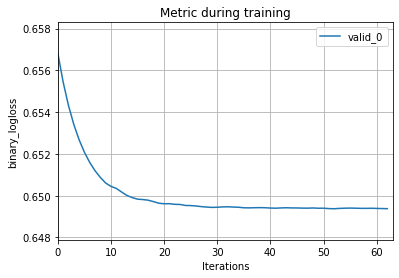

In [20]:
lgb.plot_metric(model)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

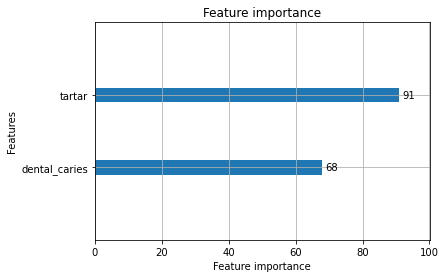

In [21]:
lgb.plot_importance(model)

### Logistic Regression

LogisticRegression(max_iter=10000)

['MINIproject']

0.6308465750965078

0.6308465750965078

confusion_matrix : 
 [[7027    0]
 [4112    0]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

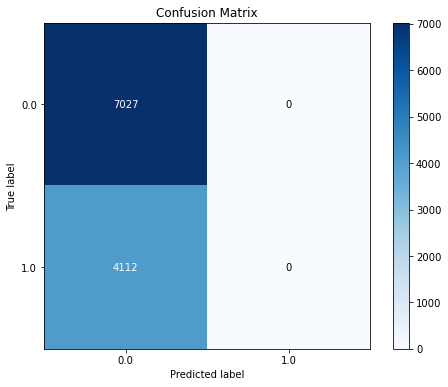

리포트:
               precision    recall  f1-score   support

         0.0       0.63      1.00      0.77      7027
         1.0       0.00      0.00      0.00      4112

    accuracy                           0.63     11139
   macro avg       0.32      0.50      0.39     11139
weighted avg       0.40      0.63      0.49     11139



C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(max_iter = 10000)

model2.fit(X_train,y_train)

import joblib
joblib.dump(model2, 'MINIproject')

model2.score(X_test,y_test)
pred_2 = model2.predict(X_test)
acc2 = accuracy_score(y_test,pred_2)
acc2

# 실제 , 예측
cm_2 = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm_2)

skplt.metrics.plot_confusion_matrix(y_test,pred_2,figsize=(8,6))
plt.show()

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

### Support Vector Machine

In [ ]:
### 모델 - svm ###
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
model = svm.SVC()

kernel_list = ['rbf']
C_list = [1]
gamma_list = [0.3]

param = {'kernel' : kernel_list , 'C' : C_list, 'gamma':gamma_list}

model = GridSearchCV(model, param, cv=5,n_jobs=-1)
model.fit(X_train, y_train)

# 결과 확인
print('best_params : ', model.best_params_)
print('best_score_ : ', model.best_score_)


# pred = model.predict(X_test)
# acc = accuracy_score(y_test, pred) 
# acc 

# from sklearn.metrics import confusion_matrix 
# import scikitplot as skplt 

# pred = model.predict(X_test) # 실제 , 예측 
# cm = confusion_matrix(y_test, pred) 
# print('confusion_matrix : \n', cm) 
# skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6)) 
# plt.show()


In [23]:
df = pd.read_csv('C:/ds_work/ML_DATA/smoking.csv')
df.shape  # (55693, 27)

(55692, 27)

In [24]:
df = df.replace({'F':0,'M':1})

from sklearn.preprocessing import LabelEncoder

lbe = LabelEncoder()
lbe.fit_transform(df["oral"])
df["oral"] = lbe.fit_transform(df["oral"])

lbe.fit_transform(df["tartar"])
df["tartar"] = lbe.fit_transform(df["tartar"])

df = df.astype(float)

df.info()


array([0, 0, 0, ..., 0, 0, 0])

array([1, 1, 0, ..., 0, 0, 1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  float64
 1   gender               55692 non-null  float64
 2   age                  55692 non-null  float64
 3   height(cm)           55692 non-null  float64
 4   weight(kg)           55692 non-null  float64
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

## oral 지우기

In [25]:
df=df.drop('oral', axis=1)
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,0.0,0.0,40.0,155.0,60.0,81.3,1.2,1.0,1.0,1.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0.0,1.0,0.0
1,1.0,0.0,40.0,160.0,60.0,81.0,0.8,0.6,1.0,1.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0.0,1.0,0.0
2,2.0,1.0,55.0,170.0,60.0,80.0,0.8,0.8,1.0,1.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0.0,0.0,1.0
3,3.0,1.0,40.0,165.0,70.0,88.0,1.5,1.5,1.0,1.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0.0,1.0,0.0
4,4.0,0.0,40.0,155.0,60.0,86.0,1.0,1.0,1.0,1.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0.0,0.0,0.0


In [26]:
target = df.loc[:, 'smoking']
target

0        0.0
1        0.0
2        1.0
3        0.0
4        0.0
        ... 
55687    0.0
55688    0.0
55689    0.0
55690    0.0
55691    1.0
Name: smoking, Length: 55692, dtype: float64

In [27]:
df_or = df.iloc[:, 23:25]
df_or

,dental caries,tartar
0,0.0,1.0
1,0.0,1.0
2,0.0,0.0
3,0.0,1.0
4,0.0,0.0
...,...,...
55687,1.0,1.0
55688,0.0,1.0
55689,0.0,0.0
55690,0.0,0.0


In [28]:
oral_2 = pd.concat([df_or,target], axis=1)
oral_2

,dental caries,tartar,smoking
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,0.0,0.0,0.0
...,...,...,...
55687,1.0,1.0,0.0
55688,0.0,1.0,0.0
55689,0.0,0.0,0.0
55690,0.0,0.0,0.0


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(oral_2.iloc[:,:-1],oral_2.iloc[:,-1], test_size=0.2, random_state=42)

DecisionTreeClassifier()

0.6308465750965078

confusion_matrix : 
 [[7027    0]
 [4112    0]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

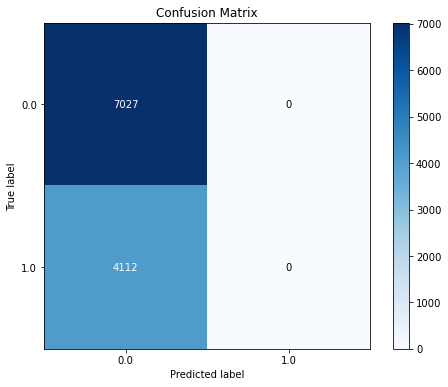

리포트:
               precision    recall  f1-score   support

         0.0       0.63      1.00      0.77      7027
         1.0       0.00      0.00      0.00      4112

    accuracy                           0.63     11139
   macro avg       0.32      0.50      0.39     11139
weighted avg       0.40      0.63      0.49     11139



C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#from sklearn.metrics import precision_score

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

pred = model.predict(X_test)
acc = accuracy_score(y_test,pred)
acc

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(X_test)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

In [31]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

x_train_std = stdsc.fit_transform(X_train)
x_test_std = stdsc.transform(X_test)

print("x_train_std mean : ",x_train_std.mean())
print("x_train_std std: ",x_train_std.std())

print("x_test_std mean: ",x_test_std.mean())
print("x_test_std std: ",x_test_std.std())

x_train_std mean :  8.13361154664447e-17
x_train_std std:  1.0
x_test_std mean:  0.005160204452225515
x_test_std std:  1.002718440612952


DecisionTreeClassifier()

0.6308465750965078

confusion_matrix : 
 [[7027    0]
 [4112    0]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

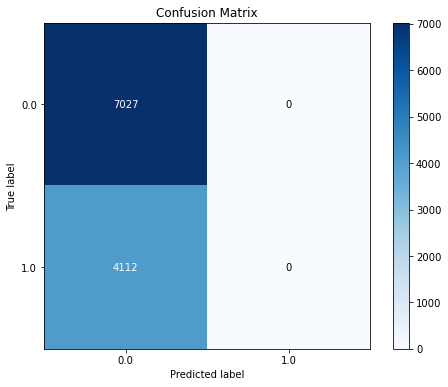

리포트:
               precision    recall  f1-score   support

         0.0       0.63      1.00      0.77      7027
         1.0       0.00      0.00      0.00      4112

    accuracy                           0.63     11139
   macro avg       0.32      0.50      0.39     11139
weighted avg       0.40      0.63      0.49     11139



C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#from sklearn.metrics import precision_score

model = DecisionTreeClassifier()
model.fit(x_train_std,y_train)

pred = model.predict(x_test_std)
acc = accuracy_score(y_test,pred)
acc

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(x_test_std)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

RandomForestClassifier()

0.6308465750965078

confusion_matrix : 
 [[7027    0]
 [4112    0]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

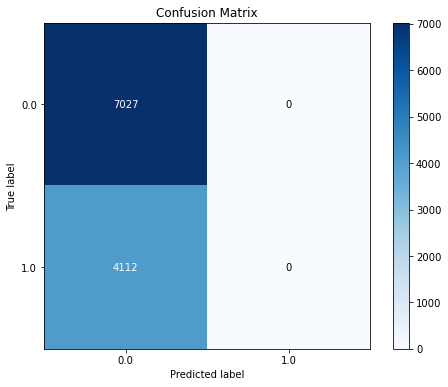

리포트:
               precision    recall  f1-score   support

         0.0       0.63      1.00      0.77      7027
         1.0       0.00      0.00      0.00      4112

    accuracy                           0.63     11139
   macro avg       0.32      0.50      0.39     11139
weighted avg       0.40      0.63      0.49     11139



C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(x_train_std,y_train)

pred = model.predict(x_test_std)
acc = accuracy_score(y_test,pred)
acc

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(x_test_std)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

In [35]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

x_train_std = stdsc.fit_transform(X_train)
x_test_std = stdsc.transform(X_test)

print("x_train_std mean : ",x_train_std.mean())
print("x_train_std std: ",x_train_std.std())

print("x_test_std mean: ",x_test_std.mean())
print("x_test_std std: ",x_test_std.std())

x_train_std mean :  8.13361154664447e-17
x_train_std std:  1.0
x_test_std mean:  0.005160204452225515
x_test_std std:  1.002718440612952


LogisticRegression(max_iter=10000)

0.6308465750965078

0.6308465750965078

confusion_matrix : 
 [[7027    0]
 [4112    0]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

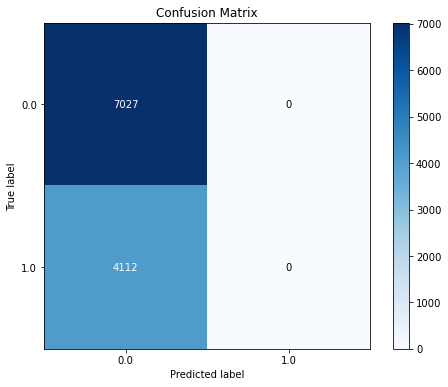

리포트:
               precision    recall  f1-score   support

         0.0       0.63      1.00      0.77      7027
         1.0       0.00      0.00      0.00      4112

    accuracy                           0.63     11139
   macro avg       0.32      0.50      0.39     11139
weighted avg       0.40      0.63      0.49     11139



C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 10000)

model.fit(x_train_std,y_train)

model.score(x_test_std,y_test)
pred = model.predict(x_test_std)
acc = accuracy_score(y_test,pred)
acc

# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

#### tartar도 지우기

In [37]:
df_or_2 = df.iloc[:, 24:25]
df_or_2

,tartar
0,1.0
1,1.0
2,0.0
3,1.0
4,0.0
...,...
55687,1.0
55688,1.0
55689,0.0
55690,0.0


In [38]:
oral_3 = pd.concat([df_or_2,target], axis=1)
oral_3

,tartar,smoking
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,0.0,0.0
...,...,...
55687,1.0,0.0
55688,1.0,0.0
55689,0.0,0.0
55690,0.0,0.0


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(oral_3.iloc[:,:-1],oral_3.iloc[:,-1], test_size=0.2, random_state=42)

DecisionTreeClassifier()

0.6308465750965078

confusion_matrix : 
 [[7027    0]
 [4112    0]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

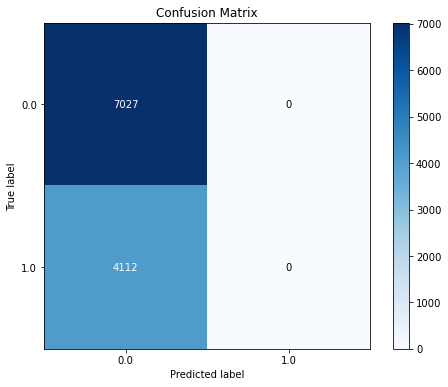

리포트:
               precision    recall  f1-score   support

         0.0       0.63      1.00      0.77      7027
         1.0       0.00      0.00      0.00      4112

    accuracy                           0.63     11139
   macro avg       0.32      0.50      0.39     11139
weighted avg       0.40      0.63      0.49     11139



C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#from sklearn.metrics import precision_score

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

pred = model.predict(X_test)
acc = accuracy_score(y_test,pred)
acc

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(X_test)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)